In [1]:
import pandas as pd

# Load exchange rates file

fx = pd.read_csv("../st2195_Assignment_6/fx.csv", skiprows=6, header=None, usecols=[0,1], 
    na_values=['-'])  #missing exchange rates are marked '-'
fx.columns = ["date", "exchange_rate"]

fx.info()
fx

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5937 non-null   object 
 1   exchange_rate  5875 non-null   float64
dtypes: float64(1), object(1)
memory usage: 92.9+ KB


,date,exchange_rate
0,2021-12-10,1.1273
1,2021-12-09,1.1311
2,2021-12-08,1.1299
3,2021-12-07,1.1256
4,2021-12-06,1.1287
...,...,...
5932,1999-01-08,1.1659
5933,1999-01-07,1.1632
5934,1999-01-06,1.1743
5935,1999-01-05,1.1790


In [2]:
# Load speeches file

speeches = pd.read_csv("../st2195_Assignment_6/speeches.csv", sep = '|', encoding='utf-8')
speeches = speeches[['date', 'contents']]
#speeches = pd.read_csv("./data/speeches.csv", sep='|', encoding='utf-8', usecols=['date', 'contents'])

speeches.dropna(inplace=True)
#speeches.dropna(inplace=True, subset=['contents'])

# Group 'contents' by 'date', then join all contents by date
# We need to also reset index
speeches = speeches.groupby('date')['contents'].apply(lambda x: " ".join(x)).reset_index()
#speeches = speeches.groupby('date')['contents'].apply(lambda x: " ".join(x.astype(str))).reset_index()
speeches.info()
speeches

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1927 non-null   object
 1   contents  1927 non-null   object
dtypes: object(2)
memory usage: 30.2+ KB


,date,contents
0,1997-02-07,Conference organised by the Hungarian Bankin...
1,1997-03-10,Securing the benefits of EMU Address by Al...
2,1997-04-22,Convergence and the role of the European Cen...
3,1997-04-30,The operation of monetary policy in stage th...
4,1997-05-13,The European Central Bank: independent and a...
...,...,...
1922,2021-11-22,SPEECH Ralph Koijen’s contribution to rese...
1923,2021-11-24,SPEECH Patient monetary policy amid a rock...
1924,2021-11-25,SPEECH When you need change to preserve co...
1925,2021-11-26,SPEECH Change and continuity in law Keyn...


In [3]:
# Merge fx and speeches data into one dataset

# Combine fx and speeches into a new dataframe
df = pd.merge(fx, speeches, how='left')
#df = pd.merge(fx, speeches, on='date', how='left')

# Convert 'date' to be of date type
df['date'] = pd.to_datetime(df['date'])
df['exchange_rate'] = pd.to_numeric(df['exchange_rate'])

# Set index to 'date'
df.set_index('date', inplace= True)
df.info()
#df.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5937 entries, 2021-12-10 to 1999-01-04
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   exchange_rate  5875 non-null   float64
 1   contents       1766 non-null   object 
dtypes: float64(1), object(1)
memory usage: 139.1+ KB


## Remove entries with obvious outliers or mistakes

We first see if there is any obvious outliers or mistakes by plotting the data

<AxesSubplot:xlabel='date'>

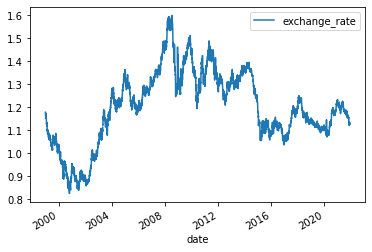

In [5]:
df.plot()

In [6]:
df.describe()

,exchange_rate
count,5875.000000
mean,1.199110
std,0.159114
min,0.825200
25%,1.102600
50%,1.198300
75%,1.316200
max,1.599000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5937 entries, 2021-12-10 to 1999-01-04
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   exchange_rate  5875 non-null   float64
 1   contents       1766 non-null   object 
dtypes: float64(1), object(1)
memory usage: 139.1+ KB


The data does not seem to have obvious outliers or mistakes. 

## Handle missing observations for the exchange rates

In [8]:
# Check if there is missing data
df.isna().sum()

exchange_rate      62
contents         4171
dtype: int64

In [9]:
# Fill in the exchange rate with the latest information available
df.exchange_rate.fillna(method='bfill', inplace=True)  # handle missing exchange rates

In [10]:
# Check again if there's more missing data
df.isna().sum()

exchange_rate       0
contents         4171
dtype: int64

In [11]:
df

,exchange_rate,contents
date,,
2021-12-10,1.1273,NaN
2021-12-09,1.1311,NaN
2021-12-08,1.1299,NaN
2021-12-07,1.1256,NaN
2021-12-06,1.1287,NaN
...,...,...
1999-01-08,1.1659,NaN
1999-01-07,1.1632,NaN
1999-01-06,1.1743,NaN


## Calculate exchange rate return

In [12]:
# Get the exchange rate return ((current_rate-previous_rate)/(previous_rate))
# 'df.exchange_rate.pct_change(-1)' computes % change from following/next row's exchange rate
# Since dataframe is sorted by most recent dates, this is what we want

df['return'] = df.exchange_rate.pct_change(-1)
df

,exchange_rate,contents,return
date,,,
2021-12-10,1.1273,NaN,-0.003360
2021-12-09,1.1311,NaN,0.001062
2021-12-08,1.1299,NaN,0.003820
2021-12-07,1.1256,NaN,-0.002747
2021-12-06,1.1287,NaN,-0.000354
...,...,...,...
1999-01-08,1.1659,NaN,0.002321
1999-01-07,1.1632,NaN,-0.009452
1999-01-06,1.1743,NaN,-0.003986


In [13]:
# Extend the dataframe with the variables "good_news" and "bad_news"
df['good_news'] = (df['return'] > 0.5/100).astype(int)
df['bad_news'] = (df['return'] < -0.5/100).astype(int)
df

,exchange_rate,contents,return,good_news,bad_news
date,,,,,
2021-12-10,1.1273,NaN,-0.003360,0,0
2021-12-09,1.1311,NaN,0.001062,0,0
2021-12-08,1.1299,NaN,0.003820,0,0
2021-12-07,1.1256,NaN,-0.002747,0,0
2021-12-06,1.1287,NaN,-0.000354,0,0
...,...,...,...,...,...
1999-01-08,1.1659,NaN,0.002321,0,0
1999-01-07,1.1632,NaN,-0.009452,0,1
1999-01-06,1.1743,NaN,-0.003986,0,0


## Remove the entries for which contents column has NA values

In [14]:
# Remove rows with NAs
df.dropna(inplace=True)
df.head()

,exchange_rate,contents,return,good_news,bad_news
date,,,,,
2021-11-29,1.1276,SPEECH Dialogue in a changing world Lect...,-0.001328,0,0
2021-11-26,1.1291,SPEECH Change and continuity in law Keyn...,0.006059,1,0
2021-11-25,1.1223,SPEECH When you need change to preserve co...,0.001517,0,0
2021-11-24,1.1206,SPEECH Patient monetary policy amid a rock...,-0.004707,0,0
2021-11-22,1.1278,SPEECH Ralph Koijen’s contribution to rese...,0.000621,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1766 entries, 2021-11-29 to 1999-01-14
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   exchange_rate  1766 non-null   float64
 1   contents       1766 non-null   object 
 2   return         1766 non-null   float64
 3   good_news      1766 non-null   int64  
 4   bad_news       1766 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 82.8+ KB


## Associate words with "good_news" and "bad_news"

In [16]:
#df.contents[df.good_news==1]
#df.contents[df.bad_news==1]

In [17]:
# Get the contents related to "good_news" and "bad_news"
# Concatenate all "good news" contents into one long string 'good_news_content'
# Concatenate all "bad news" contents into one long string 'bad_news_content'
good_news_contents = df.contents[df.good_news==1].str.cat(sep=' ')
bad_news_contents = df.contents[df.bad_news==1].str.cat(sep=' ')

In [18]:
# You may download the list of stop words from this link -- https://countwordsfree.com/stopwords
# You can also use any other sources
# Load the list of stop words into a set
stop_words = set(pd.read_csv("../../prac/stop_words_english.txt", header=None).iloc[:,0].tolist())
stop_words

{"'ll",
 "'ve",
 'I',
 'a',
 "a's",
 'able',
 'about',
 'above',
 'abroad',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'adopted',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ago',
 'ah',
 'ahead',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'alongside',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amid',
 'amidst',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'apparently',
 'appear',
 'appreciate',
 'appropriate',
 'approximately',
 'are',
 'aren',
 "aren't",
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'backward',
 'backwards',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 '

In [19]:
#pd.read_csv("./data/stop_words_english.txt", header=None)
#pd.read_csv("./data/stop_words_english.txt", header=None).iloc[:,0]
#pd.read_csv("./data/stop_words_english.txt", header=None).iloc[:,0].tolist()

In [20]:
# Below is a basic word count function as a starting point

#def word_count(str):
#    counts = dict()
#    words = str.split()
#    for word in words:
#        if word in counts:
#            counts[word] += 1
#        else:
#            counts[word] = 1
#    return counts

In [21]:
# The function below helps us to get the most common words (excluding stop_words) related to good_news and bad_news. 
# Please read the comments to understand how it works:

import string

def get_word_freq(contents, stop_words, num_words):
    
    freq = dict()
    
    for word in contents.split():
        
        word = word.strip(string.punctuation+'–')  #remove all punctuations
        word = word.lower()  #convert to lower case
        
        if (word not in stop_words) and len(word):
            if word in freq:
                freq[word] += 1
            else:
                freq[word] = 1
    
    # Goes through the all items in the dictionary and sort by value (item[1]) in reverse order
    # Converts the resulting list to a dictionary
    # Syntax for sorted: sorted(iterable, key, reverse)

    freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True)) 
    #freq = dict(sorted(freq.items(), key = lambda item: -item[1]))  #alternative that sorts on negated value
    
    return list(freq.items())[:num_words]
    #return list(freq.keys())[:num_words]  #to return just the keys


In [22]:
# Use the function above to get the 20 most common words associated with `good_news` and `bad_news`
good_indicators = get_word_freq(good_news_contents, stop_words, num_words = 20)
bad_indicators = get_word_freq(bad_news_contents, stop_words, num_words = 20)

In [23]:
good_indicators

[('euro', 6821),
 ('financial', 6438),
 ('policy', 5758),
 ('monetary', 5535),
 ('area', 4703),
 ('economic', 3600),
 ('market', 3414),
 ('central', 3314),
 ('stability', 3055),
 ('ecb', 2911),
 ('inflation', 2894),
 ('banks', 2872),
 ('european', 2806),
 ('der', 2719),
 ('die', 2704),
 ('price', 2579),
 ('growth', 2506),
 ('countries', 2444),
 ('la', 2441),
 ('markets', 2373)]

In [24]:
bad_indicators

[('euro', 7496),
 ('financial', 6825),
 ('policy', 5865),
 ('monetary', 5652),
 ('area', 5360),
 ('market', 3797),
 ('central', 3711),
 ('economic', 3585),
 ('banks', 3536),
 ('stability', 3216),
 ('european', 3014),
 ('ecb', 2863),
 ('growth', 2802),
 ('price', 2726),
 ('inflation', 2718),
 ('bank', 2587),
 ('la', 2587),
 ('markets', 2586),
 ('countries', 2452),
 ('risk', 2143)]

Note that many terms appear in both, and the results are not the same as R. It may because the `word_tokenizer()` in R may not work the same way as `split()` with `strip()`.

In [25]:
from collections import Counter
import string

def get_word_freq2(contents, stop_words, num_words):
    
    wordlist = list()
    
    for word in contents.split():
        
        word = word.strip(string.punctuation+'–')  #remove all punctuations
        word = word.lower()  #convert to lower case
        
        if (word not in stop_words) and len(word):
            wordlist.append(word)
        
    freq = Counter(wordlist)
    
    return freq.most_common(num_words)

print('good_indicators')
print(get_word_freq2(good_news_contents, stop_words, num_words = 20))
print('\nbad_indicators')
print(get_word_freq2(bad_news_contents, stop_words, num_words = 20))


good_indicators
[('euro', 6821), ('financial', 6438), ('policy', 5758), ('monetary', 5535), ('area', 4703), ('economic', 3600), ('market', 3414), ('central', 3314), ('stability', 3055), ('ecb', 2911), ('inflation', 2894), ('banks', 2872), ('european', 2806), ('der', 2719), ('die', 2704), ('price', 2579), ('growth', 2506), ('countries', 2444), ('la', 2441), ('markets', 2373)]

bad_indicators
[('euro', 7496), ('financial', 6825), ('policy', 5865), ('monetary', 5652), ('area', 5360), ('market', 3797), ('central', 3711), ('economic', 3585), ('banks', 3536), ('stability', 3216), ('european', 3014), ('ecb', 2863), ('growth', 2802), ('price', 2726), ('inflation', 2718), ('bank', 2587), ('la', 2587), ('markets', 2586), ('countries', 2452), ('risk', 2143)]


In [27]:
# Alternative + Additional -- Using Counter from collections module and applying lemmatization

from collections import Counter
import string

import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet') #run this if need to download package wordnet

def get_word_freq2(contents, stop_words, num_words):
    
    wordlist = list()
    
    # Initialise the Wordnet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    for word in contents.split():
        
        word = word.strip(string.punctuation+'–')  #remove all punctuations
        word = word.lower()  #convert to lower case
        word = lemmatizer.lemmatize(word)
        
        if (word not in stop_words) and len(word):
            wordlist.append(word)

    freq = Counter(wordlist)
    
    return freq.most_common(num_words)

print('good_indicators')
print(get_word_freq2(good_news_contents, stop_words, num_words = 20))
print('\nbad_indicators')
print(get_word_freq2(bad_news_contents, stop_words, num_words = 20))


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samanthatricia/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


good_indicators
[('euro', 6909), ('policy', 6846), ('financial', 6438), ('market', 5787), ('monetary', 5535), ('bank', 5134), ('area', 5010), ('ha', 4950), ('price', 3654), ('rate', 3606), ('economic', 3600), ('central', 3314), ('la', 3094), ('stability', 3055), ('ecb', 2911), ('risk', 2896), ('inflation', 2896), ('european', 2844), ('country', 2828), ('der', 2719)]

bad_indicators
[('euro', 7531), ('policy', 6838), ('financial', 6825), ('market', 6383), ('bank', 6123), ('area', 5710), ('monetary', 5652), ('ha', 5331), ('rate', 4092), ('price', 3950), ('central', 3711), ('economic', 3585), ('risk', 3474), ('stability', 3216), ('european', 3050), ('country', 2908), ('ecb', 2863), ('la', 2853), ('growth', 2802), ('inflation', 2719)]
